# Netzwerkvisualisierung

In diesem JupyterNotebook zeigen wir euch, wie man ein Netzwerk visualisiert und analysiert. Wir machen dies am Beispiel der Konsortien, die sich bei der Nationalen Forschungsdateninfrastrukturinitiative (NFDI) beteiligen bzw. beworben haben.

Als Datengrundlage nehmen wir die *Letter of Intent* der jeweiligen Konsortien, in denen Kooperationspartner genannt werden. Diese Nennungen sind Ausgangspunkt unseres Netzwerkes.[^1]

[^1]: Siehe dazu auch das Repositorium von Dorothea Strecker (https://github.com/dorothearrr/NFDI_Netzwerk), in dem sie bereits eine ähnliche Visualisierung und Analyse vorgenommen hat.

Die Visualisierung machen wir in einem JupyterNotebook bzw. RNoteBook[^2], sodass keine lokale Installation von R notwendig ist. 
JupyterNotebooks sind so aufgebaut, dass man verschiedene Zellen hat, in die man Code schreibt (in unserem Fall `R`-Code).
Um die Zelle mit dem Code auszuführen, können wir im Menü auf "*Cell*" und "*Run Cells*" klicken.
Oder mit dem Cursor in die Zelle klicken und anschließend gleichzeitig *SHIFT*" und "*ENTER*" drücken.
Ihr seht dann das Ergebnis des Codes direkt unter der Zelle angezeigt.

[^2]: https://rnotebook.io

Bevor wir loslegen, möchten wir noch ein paar Begriffe klären.
Ein Netzwerk besteht aus drei Komponenten:

* Knoten (Kreis)
* Kanten (Balken)
* Kreuzungen (Schnittpunkte)

Knoten (*nodes* oder *vertices*) werden als Kreise dargestellt und repräsentieren Konsortien. Kanten (*edges*) werden als mehr oder minder gebogene Balken dargestellt und gehen von den Knoten aus. Sie zeigen eine Verbindung zwischen zwei Knoten an. Kreuzungen (*crossings*) sind Schnittpunkte zweier oder mehrerer Kanten. 

![Komponenten eines Netzwerks. Erstellt von ÉD.](img/Einheitskreis_Gestalt.png)

R ist so aufgebaut, dass verschiedene Bibliotheken für unterschiedliche Funktionen geladen werden müssen.
Für die Netzwerkanalyse werden wir auf das Paket `igraph`[^2] zurückgreifen.
Mit `library('igraph')` können wir das Paket laden. 

[^2]: https://igraph.org/r/

In [3]:
library('igraph')

Die Datengrundlage steht bereits in Form einer Auflistung zur Verfügung,[^1b], sodass wir 
die Daten kopieren und in die nächste Zelle einfügen können.


[^1b]: https://gist.github.com/LukasCBossert/27fafa33e9b16c33e1107914e928c472 

Fangen wir bei der Funktion `read.table` an.
Wir geben an, dass es sich um einen Datensatz handelt, bei dem es 

* eine Kopfzeile gibt, daher `header=TRUE`
* die Trennung der Werte durch ein Komma erfolgt, `sep=","`.
* Schließlich die Werte selbst, die zwischen den Anführungszeichen von 
  `text=""` stehen.
  
Diese Werte übergeben wir der selbstgewählten Variable `NFDI_edges` , was mit dem nach links weisenden Pfeilsymbol erfolgt.

In [5]:
NFDI_edges <- read.table(header=TRUE,
                         sep=",",
                         text="
from,to
BERD@NFDI,KonsortSWD
BERD@NFDI,MaRDI
BERD@NFDI,NFDI4Memory
BERD@NFDI,Text+
DAPHNE4NFDI,FAIRmat
DAPHNE4NFDI,NFDI-MatWerk
DAPHNE4NFDI,NFDI4Cat
DAPHNE4NFDI,NFDI4Chem
DAPHNE4NFDI,NFDI4Health
DAPHNE4NFDI,NFDI4Ing
DAPHNE4NFDI,NFDI4Objects
DAPHNE4NFDI,PUNCH4NFDI
FAIRmat,DAPHNE4NFDI
FAIRmat,DataPLANT
FAIRmat,MaRDI
FAIRmat,NFDI-MatWerk
FAIRmat,NFDI4Cat
FAIRmat,NFDI4Chem
FAIRmat,NFDI4DataScience
FAIRmat,NFDI4Ing
FAIRmat,NFDIxCS
FAIRmat,PUNCH4NFDI
MaRDI,BERD@NFDI
MaRDI,FAIRmat
MaRDI,NFDI-MatWerk
MaRDI,NFDI-Neuro
MaRDI,NFDI4Cat
MaRDI,NFDI4Chem
MaRDI,NFDI4Ing
MaRDI,PUNCH4NFDI
NFDI-MatWerk,DAPHNE4NFDI
NFDI-MatWerk,DataPLANT
NFDI-MatWerk,FAIRmat
NFDI-MatWerk,MaRDI
NFDI-MatWerk,NFDI4Chem
NFDI-MatWerk,NFDI4DataScience
NFDI-MatWerk,NFDI4Ing
NFDI-MatWerk,NFDIxCS
NFDI-Neuro,DataPLANT
NFDI-Neuro,GHGA
NFDI-Neuro,NFDI4BioDiversity
NFDI-Neuro,NFDI4Culture
NFDI-Neuro,NFDI4Earth
NFDI-Neuro,NFDI4Health
NFDI-Neuro,NFDI4Ing
NFDI-Neuro,NFDI4Microbiota
NFDI4Agri,DataPLANT
NFDI4Agri,KonsortSWD
NFDI4Agri,NFDI4BioDiversity
NFDI4Agri,NFDI4Earth
NFDI4Agri,NFDI4Health
NFDI4Agri,NFDI4Immuno
NFDI4Agri,NFDI4Microbiota
NFDI4DataScience,KonsortSWD
NFDI4DataScience,MaRDI
NFDI4DataScience,NFDI-MatWerk
NFDI4DataScience,NFDI4BioDiversity
NFDI4DataScience,NFDI4Cat
NFDI4DataScience,NFDI4Chem
NFDI4DataScience,NFDI4Culture
NFDI4DataScience,NFDI4Health
NFDI4DataScience,NFDI4Ing
NFDI4DataScience,NFDI4Microbiota
NFDI4DataScience,NFDIxCS
NFDI4Earth,DataPLANT
NFDI4Earth,GHGA
NFDI4Earth,KonsortSWD
NFDI4Earth,NFDI4Agri
NFDI4Earth,NFDI4BioDiversity
NFDI4Earth,NFDI4Cat
NFDI4Earth,NFDI4Chem
NFDI4Earth,NFDI4Culture
NFDI4Earth,NFDI4Health
NFDI4Earth,NFDI4Ing
NFDI4Earth,NFDI4Objects
NFDI4Immuno,GHGA
NFDI4Immuno,NFDI4Agri
NFDI4Immuno,NFDI4Health
NFDI4Immuno,NFDI4Microbiota
NFDI4Memory,BERD@NFDI
NFDI4Memory,KonsortSWD
NFDI4Memory,MaRDI
NFDI4Memory,NFDI4Culture
NFDI4Memory,NFDI4Objects
NFDI4Memory,Text+
NFDI4Microbiota,DataPLANT
NFDI4Microbiota,GHGA
NFDI4Microbiota,NFDI4Agri
NFDI4Microbiota,NFDI4BioDiversity
NFDI4Microbiota,NFDI4Chem
NFDI4Microbiota,NFDI4DataScience
NFDI4Microbiota,NFDI4Health
NFDI4Microbiota,NFDI4Immuno
NFDI4Microbiota,NFDI4Ing
NFDI4Objects,KonsortSWD
NFDI4Objects,NFDI4Agri
NFDI4Objects,NFDI4BioDiversity
NFDI4Objects,NFDI4Culture
NFDI4Objects,NFDI4Earth
NFDI4Objects,NFDI4Memory
NFDI4Objects,Text+
NFDI4SD,NFDI4Culture
NFDI4SD,NFDI4DataScience
NFDI4SD,NFDI4Memory
NFDI4SD,NFDI4Objects
NFDIxCS,FAIRmat
NFDIxCS,MaRDI
NFDIxCS,NFDI4Chem
NFDIxCS,NFDI4DataScience
NFDIxCS,NFDI4Earth
NFDIxCS,NFDI4Ing
PUNCH4NFDI,DAPHNE4NFDI
PUNCH4NFDI,FAIRmat
PUNCH4NFDI,GHGA
PUNCH4NFDI,MaRDI
PUNCH4NFDI,NFDI4Earth
PUNCH4NFDI,NFDI4Ing
PUNCH4NFDI,NFDIxCS
Text+,KonsortSWD
Text+,NFDI4BioDiversity
Text+,NFDI4Culture
Text+,NFDI4Earth
Text+,NFDI4Ing
Text+,NFDI4Memory
Text+,NFDI4Objects
")


Damit wir aus diesem Datensatz ein Netzwerk erstellen können,
müssen wir es aufbereiten und ein `igraph graph` erstellen.[^3]
Das geschieht mit der Funktion `graph_from_data_frame`, der wir unseren Datensatz übergeben.

Zudem geben wir an, dass unser Datensatz bzw. das Netzwerk ungerichtet ist 
(`directed=FALSE`), das heißt, dass die Richtung, wie sie bei `from,to` im Datensatz
angegeben ist, egal ist.
Es geht uns jetzt nur darum, dass zwei Konsortien verknüpft sind. 


[^3]: https://igraph.org/r/doc/graph_from_data_frame.html

In [7]:
NFDI_network <- graph_from_data_frame(NFDI_edges,
                                      directed=FALSE
                                     )

## Erstes Netzwerk (Grundeinstellung)


Zunächst werden wir einen Parameter festlegen, damit unser Netzwerk bei gleicher Datengrundlage immer gleich aussieht. Dieser Parameter ist `seed`.
Wir wählen eine beliebige Zahl, die nicht allzu klein ist.

Anschließend kommen wir zum eigentlichen Plot.
Dafür rufen wir die Funktion `plot` auf und übergeben ihr die Variable unseres Netzwerkgraphen `NFDI_network`.
Für einen Titel können wir noch den Parameter `main` bestimmen und ebenso können wir angeben, ob wir mit `frame=TRUE` einen Rahmen um das Netzwerk haben wollen.

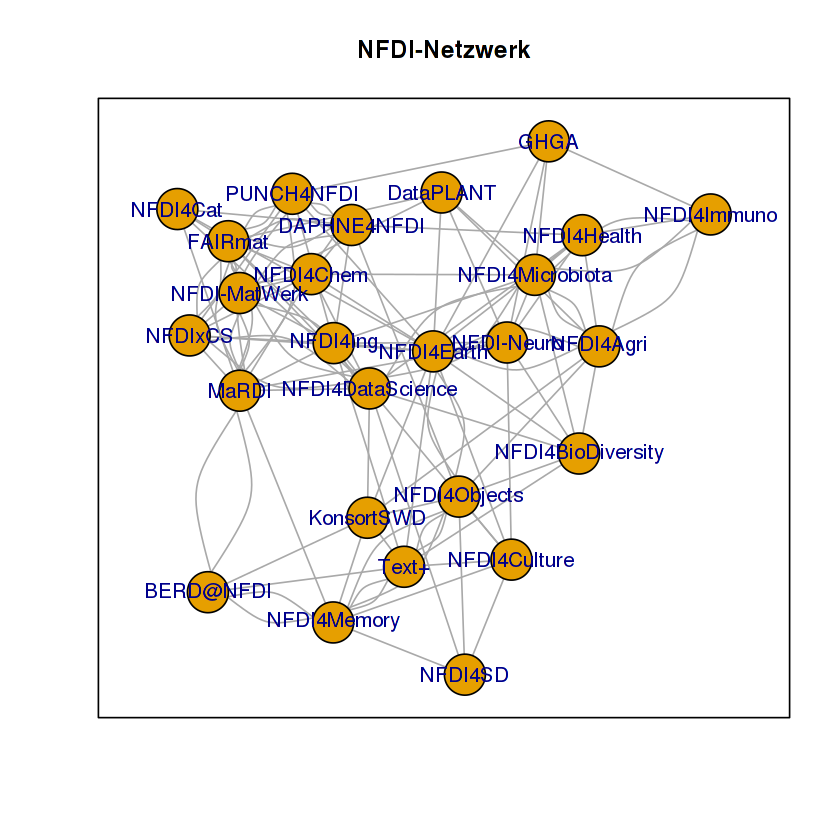

In [9]:
set.seed(1234)

plot(NFDI_network,                    # loading data frame
     main  = "NFDI-Netzwerk",         # adding a title
     frame = TRUE                     # FALSE -> making a frame 
     )


Wir sehen das Netzwerk der NFDI-Konsortien ohne weitere Einstellungen.

## Layout-Einstellungen

Als nächsten Schritt möchten wir das Layout des Netzwerks optimieren.
Anstatt den Code für den Plot nochmals abzutippen, werden wir den Inhalt der letzten Zelle markieren, kopieren und in die nächste Zelle einfügen.

Wir erweitern auf diese Weise den Code und arbeiten Schritt für Schritt am Netzwerk.

Für das Layout von Netzwerken gibt es verschiedene Algorithmen.
Je nach Datensatz kann mal das eine, mal ein anderes besser geeignet sein.
Meiner Meinung nach erzielen wir ein gutes Ergebnis mit dem Layout `graphopt`[^4].

Dieses Layout übergeben wir dem Parameter `layout` mit dem Wert `layout.graphopt`.

[^4]: https://igraph.org/r/doc/layout_with_graphopt.html

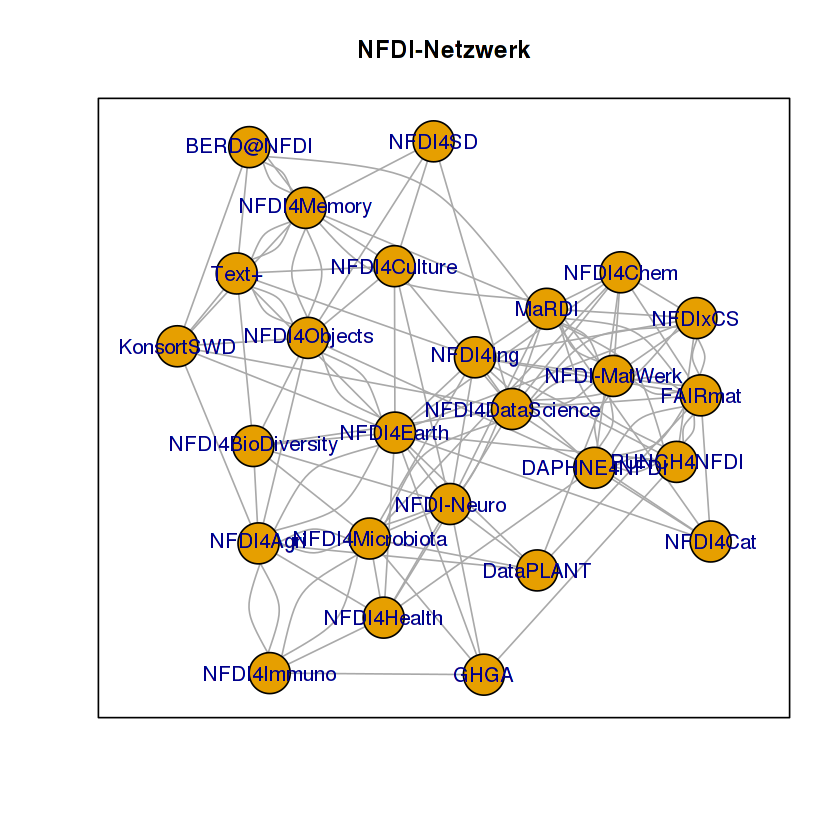

In [10]:
set.seed(1234)

plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # FALSE -> making a frame
     layout = layout.graphopt,         #* better layout options
     )


Das Netzwerk ist jetzt schon besser strukturiert und die Abstände der Knoten ist harmonischer.

Wer möchte, der kann weitere Layout-Einstellungen ausprobieren:

* `layout.auto`: Choose an appropriate graph layout algorithm automatically
* `layout.davidson.harel`: The Davidson-Harel layout algorithm
* `layout.drl`: The DrL graph layout generator
* `layout.fruchterman.reingold`: Deprecated layout functions
* `layout.gem`: The GEM layout algorithm
* `layout.graphopt`: The graphopt layout algorithm
* `layout.grid`: Simple grid layout
* `layout.mds`: Graph layout by multidimensional scaling
* `layout.merge`: Merging graph layouts
* `layout.norm`: Normalize coordinates for plotting graphs
* `layout.star`: Generate coordinates to place the vertices of a graph in a star-shape

## Farbe, Größe, Kurve (Knoten und Kanten)

Nachdem wir die Anordnung der Knoten optimiert haben, wollen wir im nächsten Schritt die Darstellung der Knoten und Kanten selbst angehen.

Es lassen sich verschiedene Werte nach eigenen Wünschen anpassen.

Zunächst möchten wir die Farbe der Knoten angehen.
Der Parameter lautet `vertex.color` und wir können einen HTML-Farbwert angeben (bspw. `#ffcc66`).[^5]
Für die Umrandung der Knoten wählen wir den gleichen Farbcode. Der Parameter lautet `vertex.frame.color`.

Die Beschriftung der Knoten lässt sich ebenfalls modifizieren. 
Die Änderung der Schriftgröße erfolgt über den Parameter `vertex.label.cex`, an den wir den Wert `0.5` übergeben.
Wichtig ist hier, dass der Wert *nicht* in Anführungszeichen geschrieben wird. 
Dies ist eine relative Größe und wir möchten die Label nur halb so groß wie im vorherigen Netzwerk dargestellt haben.
Auch die Farbe der Beschriftung ist änderbar.
Ganz analog heißt der Parameter `vertex.label.color`, an den wir den Farbwert auch als String, wie bspw. `"black"` übergeben können.

Ein Netzwerk besteht neben den Knoten auch aus Kanten, die Verbindungslinien, die wir ebenfalls modifizieren können.
Für die Farbänderung brauchen wir den Parameter `edge.color`, an den wir bspw. `"#808080"` übergeben.
Neben der Farbe können wir auch den Grad der "Kurvigkeit" bestimmen, die mit `edge.curved` und dem Wert `0.1` eingestellt wird. Wichtig ist auch hier wieder, dass *keine* Anführungszeichen gesetzt werden.




[^5]: https://www.w3schools.com/colors/colors_picker.asp

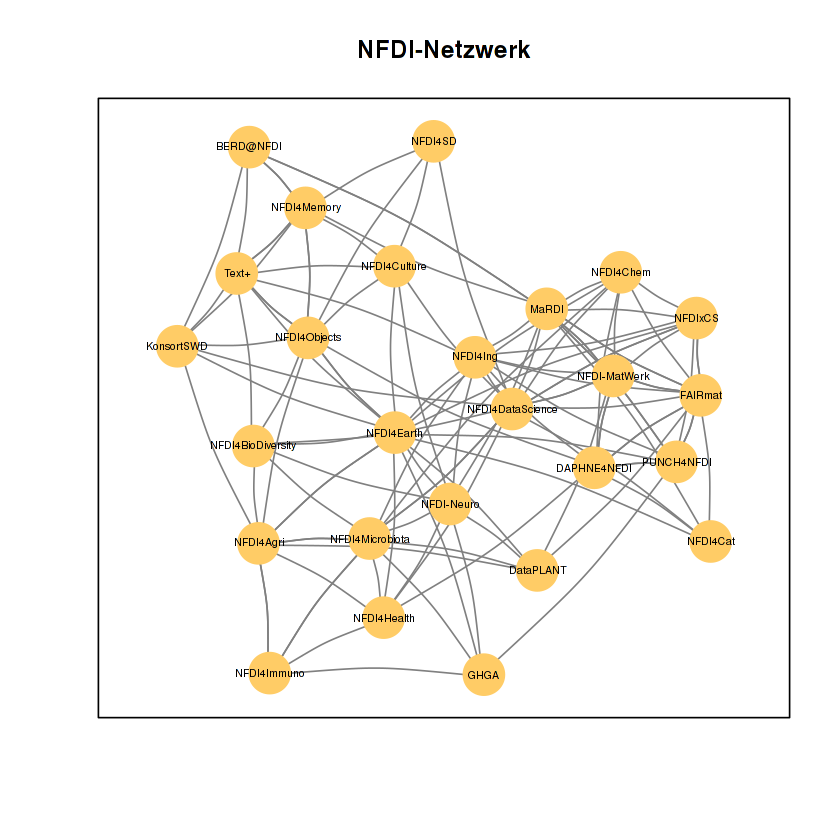

In [11]:
set.seed(1234)


plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   #* color of nodes
     vertex.frame.color = "#ffcc66",   #* color of the frame of nodes
     vertex.label.cex   = 0.5,         #* size of the description of the labels
     vertex.label.color = "black",     #* color of the description 
     edge.color         = "#808080",   #* color of edges
     edge.curved        = 0.1,         #* factor of "curvity"
     )

## Knotengröße in Abhängigkeit der Kanten

In den bisherigen Netzwerkdarstellungen sind alle Knoten gleich groß.

Jetzt möchten wir eine weitere Informationsebene einbauen und die Knotengröße entsprechend der Anzahl ihrer Kanten ausgeben.

Die Anzahl der Kanten pro Knoten können wir mit der Funktion `degree`[^6] ermitteln.
Wenn wir dieser Funktion den Datensatz des Netzwerkes übergeben (`degree(NFDI_network)`),
dann erhalten wir die Anzahl der Kanten pro Knoten.
Diese Werte nehmen wir als Größeangabe für die Kanten.

Wir erweitern somit den bisherigen Code um eine Zeile.
Die Knotengröße verbirgt sich hinter dem Parameter `vertex.size` und als Wert übergeben wir die Funktion 
`degree(NFDI_network)`.



[^6]: https://igraph.org/r/doc/degree.html


BERD@NFDI       DAPHNE4NFDI           FAIRmat             MaRDI 
                6                11                15                15 
     NFDI-MatWerk        NFDI-Neuro         NFDI4Agri  NFDI4DataScience 
               12                 9                11                16 
       NFDI4Earth       NFDI4Immuno       NFDI4Memory   NFDI4Microbiota 
               17                 6                10                13 
     NFDI4Objects           NFDI4SD           NFDIxCS        PUNCH4NFDI 
               12                 4                10                10 
            Text+        KonsortSWD          NFDI4Cat         NFDI4Chem 
               10                 7                 5                 8 
      NFDI4Health          NFDI4Ing         DataPLANT              GHGA 
                7                11                 6                 5 
NFDI4BioDiversity      NFDI4Culture 
                7                 7

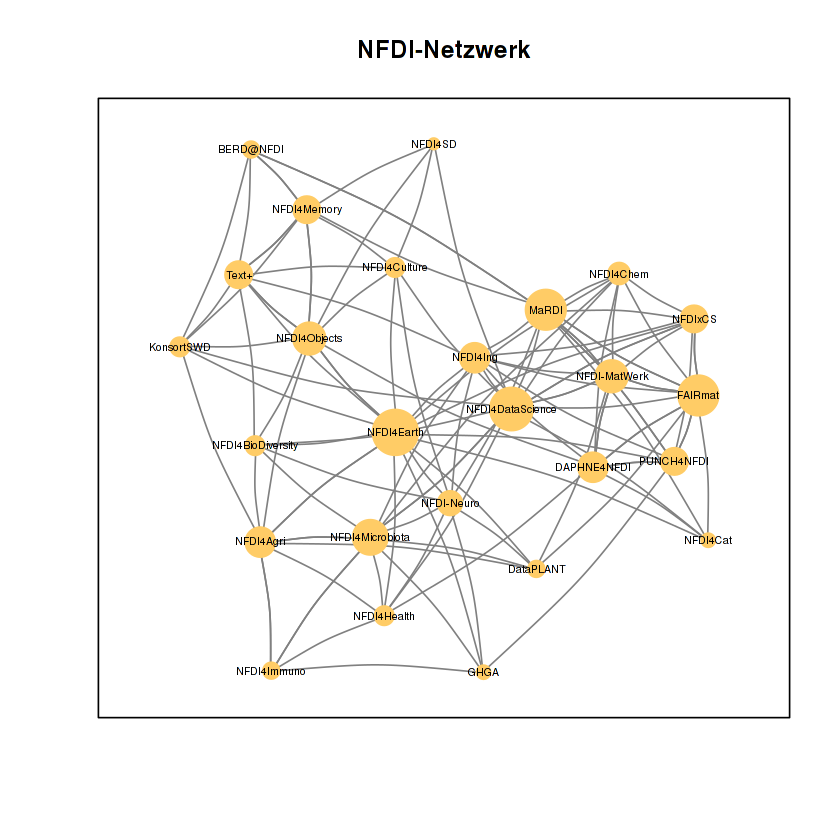

In [12]:
set.seed(1234)

degree(NFDI_network)                   #* calculate number of edges

plot(NFDI_network,                     # loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0.1,         # factor of "curvity"
     vertex.size        = degree(NFDI_network), #* size of nodes depends on amount of edges
     )





## Knotengröße in Abhängigkeit der ein- und ausgehenden Kanten

Wir haben jetzt eine zweite Informationsebene in unser Netzwerk eingeführt und können die Knotengröße in Relation zur Kantenanzahl darstellen.

Im nächsten Schritt möchten wir eine weitere Komponente einführen. 
Bislang war es unerheblich ob ein Konsortium im Datensatz an erster oder zweiter Stelle genannt wurde, das heißt, es war unerheblich ob der aktive oder der passive Kooperationspartner ist.

Jetzt möchten wir die Unterscheidung im Netzwerk berücksichtigen. 
Dafür muss unser Graph (Netzwerk) "gerichtet" werden[^7].

Wir führen eine neue Variable (`NFDI_network_directed`) ein, die den Datensatz als gerichteten Graph enthält, 
was wir mit `directed = TRUE` einstellen.

[^7]: https://de.wikipedia.org/wiki/Gerichteter_Graph

In [13]:
NFDI_network_directed <- graph_from_data_frame(NFDI_edges,
                                          directed = TRUE
                                         )

Die restlichen Plotangaben übertragen wir aus der vorherigen Zelle.
Entscheidend ist nun, dass wir der Plot-Funktion die neue Variable mit dem gerichteten Graphen übergeben.
Zudem übergeben wir auch der Funktion `degree` die neue Variable.

Im gerichteten Netzwerk erschwert die Kurvigkeit der Kanten die Lesbarkeit.
Daher wäheln wir für `edge.curved` den Wert `0`.

Ebenso sollen die Pfeilspitzen kleiner werden, was mit `edge.arrow.size` und dem relativen Wert `0.5` möglich ist.

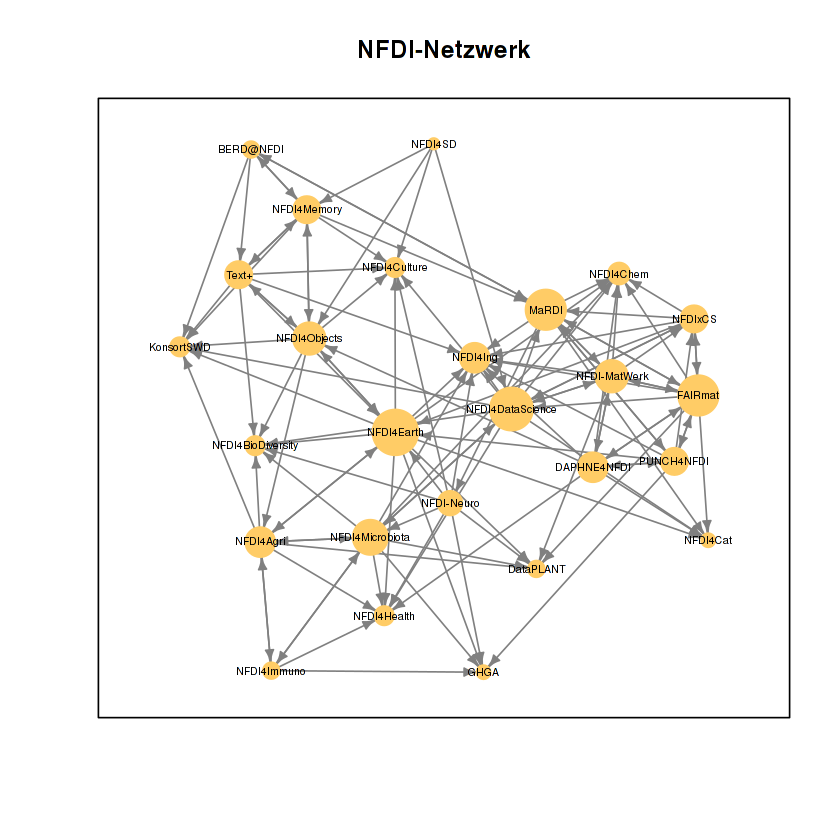

In [14]:
set.seed(1234)

plot(NFDI_network_directed,            #<<<<<<< loading data frame
     main   = "NFDI-Netzwerk",         # adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           #<<<<<<<<< factor of "curvity"
     vertex.size        = degree(NFDI_network_directed), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          #* arrow size,  defaults to 1
    )


Im nächsten Schritt möchten wir die Knotengröße entsprechend der *ein*gehenden Kanten skalieren.
Je öfter ein Konsortium als Kooperationspartner genannt wird, desto größer wird dessen Knoten.

Wir können dafür die Funktion `degree` modifizieren, indem wir `mode = "in"` ergänzen[^8].

```
degree(NFDI_network_directed,
       mode = "in")
```


[^8]: https://igraph.org/r/doc/degree.html


BERD@NFDI       DAPHNE4NFDI           FAIRmat             MaRDI 
                2                 3                 5                 7 
     NFDI-MatWerk        NFDI-Neuro         NFDI4Agri  NFDI4DataScience 
                4                 1                 4                 5 
       NFDI4Earth       NFDI4Immuno       NFDI4Memory   NFDI4Microbiota 
                6                 2                 4                 4 
     NFDI4Objects           NFDI4SD           NFDIxCS        PUNCH4NFDI 
                5                 0                 4                 3 
            Text+        KonsortSWD          NFDI4Cat         NFDI4Chem 
                3                 7                 5                 8 
      NFDI4Health          NFDI4Ing         DataPLANT              GHGA 
                7                11                 6                 5 
NFDI4BioDiversity      NFDI4Culture 
                7                 7

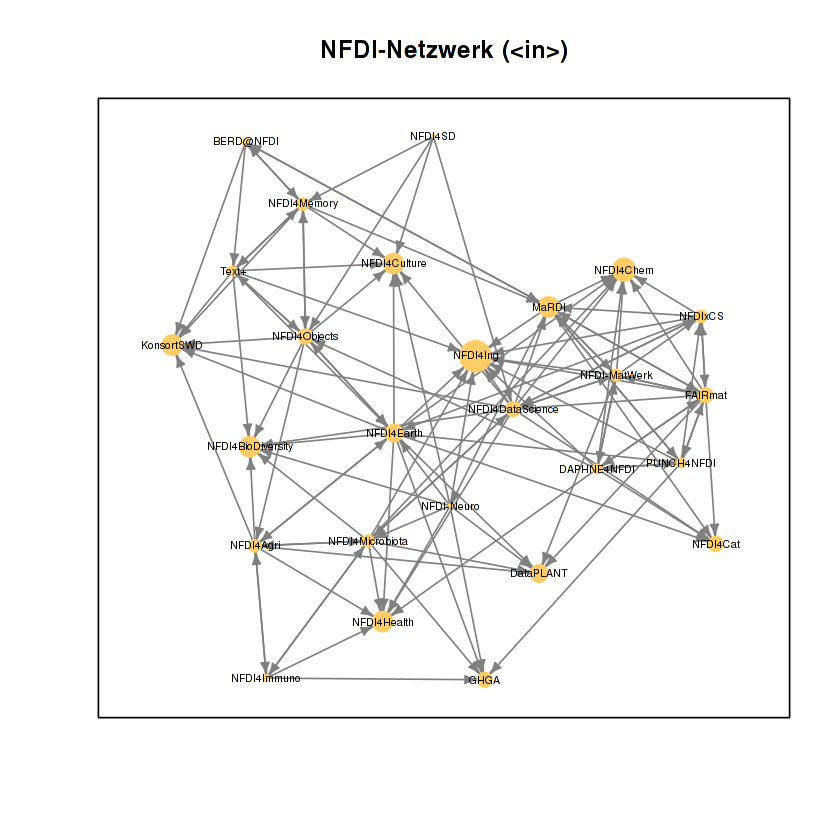

In [8]:
set.seed(1234)

degree(NFDI_network_directed,
       mode = "in")


plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<in>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "in"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )




Ebenfalls können wir nun auch die Größe der Konsortien entsprechend ihrer *aus*gehenden Kanten darstellen.

Wir übernehmen den kompletten Zelleninhalt von zuvor und ändern lediglich `in` zu `out`.



BERD@NFDI       DAPHNE4NFDI           FAIRmat             MaRDI 
                4                 8                10                 8 
     NFDI-MatWerk        NFDI-Neuro         NFDI4Agri  NFDI4DataScience 
                8                 8                 7                11 
       NFDI4Earth       NFDI4Immuno       NFDI4Memory   NFDI4Microbiota 
               11                 4                 6                 9 
     NFDI4Objects           NFDI4SD           NFDIxCS        PUNCH4NFDI 
                7                 4                 6                 7 
            Text+        KonsortSWD          NFDI4Cat         NFDI4Chem 
                7                 0                 0                 0 
      NFDI4Health          NFDI4Ing         DataPLANT              GHGA 
                0                 0                 0                 0 
NFDI4BioDiversity      NFDI4Culture 
                0                 0

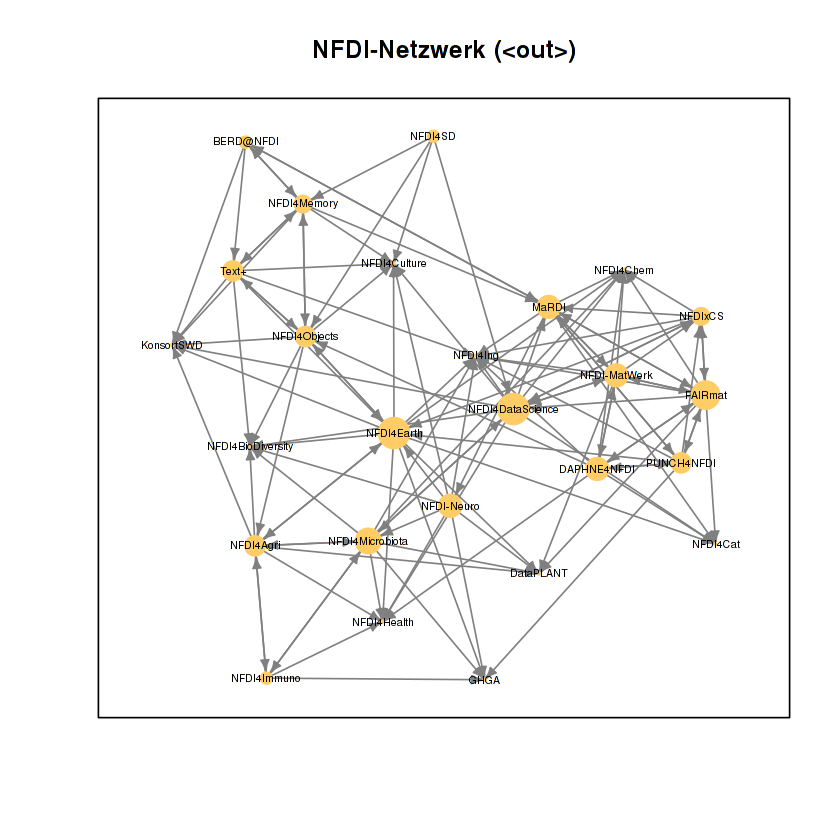

In [15]:
set.seed(1234)

degree(NFDI_network_directed,
       mode = "out")

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<out>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "out"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

Es fällt auf, dass einige Knoten schrumpfen und in der Tabelle sieht man, dass sie den Wert `0` bei ausgehenden Kanten haben. Das liegt daran, dass dies die Konsortien sind, die in der ersten Förderrunde bereits bewilligt wurden und daher keinen neuen Letter of Intent eingereicht haben. Unser Datensatz berücksichtigt ja nur die Letter of Intent der zweiten Förderrunde. 
Die Konsortien der ersten Runde können daher nur als "passive" Kooperationspartner genannt werden.

## Ausschluss der Konsortien aus der ersten Förderrunde

Wir können nun mal schauen, wie sich das Netzwerk ändert, wenn wir die bereits geförderten Konsortien ausschließen.
Damit bekommen wir ein Netzwerk, das nur die Kooperationen der Konsortien der zweiten Förderrunde berücksichtigt.

Der Filter bzw. das Löschen der besagten Konsortien funktioniert so:
Die Funktion `delete_vertices` kümmert sich um die Löschung wir müssen dafür zunächst den Netzwerkgraphen angeben,
anschließend findet eine Berechnung statt:
Es sollen alle Knoten/Konsortien gelöscht werden, deren Anzahl an Kanten (`V` = Value) im Modus `out` gleich `0` ist.
Diese gelöschte Knoten übergeben wir der neuen Variable `NFDI_network_directed_filter`,
die wir weiter nutzen können.

Als Darstellungsmodus des Netzwerks wähle ich `total`, da es mir jetzt nicht um die separate Anzahl der ein- und ausgehenden Verbindungen, sondern um deren Summe geht.



BERD@NFDI      DAPHNE4NFDI          FAIRmat            MaRDI 
               5                7               11               12 
    NFDI-MatWerk       NFDI-Neuro        NFDI4Agri NFDI4DataScience 
               9                3                7                9 
      NFDI4Earth      NFDI4Immuno      NFDI4Memory  NFDI4Microbiota 
               8                4                8                7 
    NFDI4Objects          NFDI4SD          NFDIxCS       PUNCH4NFDI 
               9                3                8                8 
           Text+ 
               6

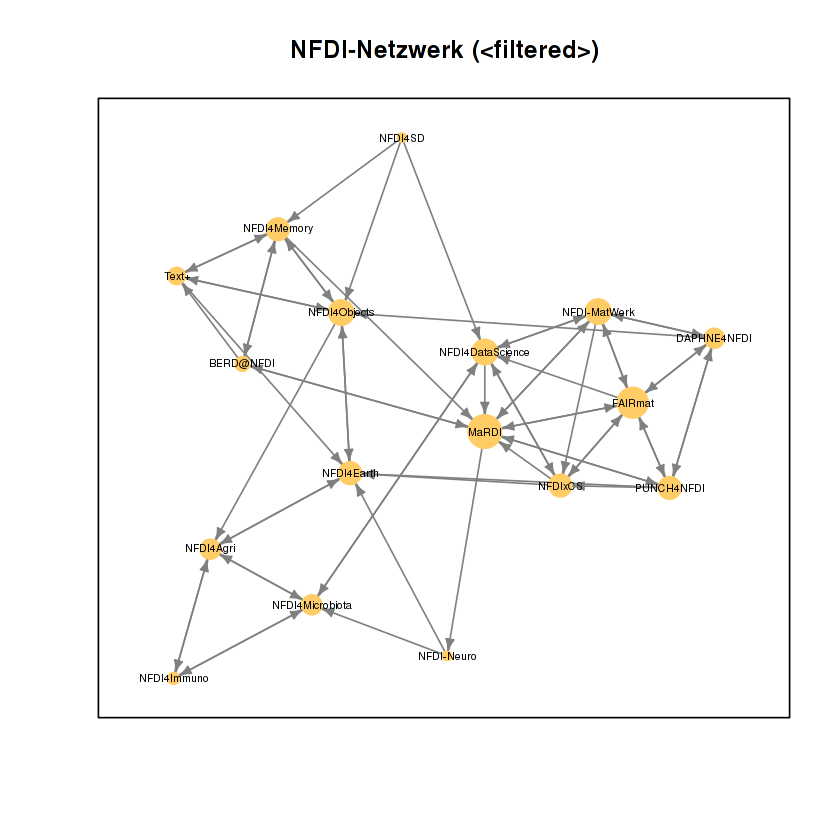

In [16]:
set.seed(1234)

NFDI_network_directed_filter <- delete_vertices(NFDI_network_directed, 
            V(NFDI_network_directed)[ degree(NFDI_network_directed, mode = "out") == 0 ])

degree(NFDI_network_directed_filter,
       mode = "total")

plot(NFDI_network_directed_filter,           #<<<<<<<< loading data frame
     main   = "NFDI-Netzwerk (<filtered>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = "#ffcc66",   # color of nodes
     vertex.frame.color = "#ffcc66",   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed_filter,
                                 mode = "total"), #<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )

# Netzwerkanalyse

Nach den bisherigen Runden der Netzwerkvisualisierung wollen wir noch einen Schritt weiter gehen und die Netzwerkstruktur analysieren.

## NFDI-Konferenzsystematik

Als ersten Schritt wollen wir die Knoten bzw. Konsortien in den Farben der NFDI-Konferenzsystematik einfärben.

Wie kommt die NFDI-Konferenzsystematik zustande?
Für die Vorträge wurden fünf Panels aufgemacht:

1. Medizin
2. Lebenswissenschaften
3. Geisteswissenschaften
4. Ingenieurwissenschaften
5. Chemie/Physik

Die antragsstellenden Konsortien wurden auf diese fünf Gruppen eingeteilt.

Auffällig ist, dass die Naturwissenschaften auf die Lebenswissenschaften, Ingenieurwissenschaften und Chemie/Physik aufgeteilt worden sind.

Alle Konsortien sind also einem dieser fünf Bereiche zugeteilt und wir wollen das nun im Netzwerk zeigen.
Diese Einteilung der Konsortien auf die Konferenzsystematik laden wir als fertigen Datensatz aus einem GitHub-Gist, was uns manche Tipparbeit sparen wird.[^10]

Dieser neue Datensatz wird der Variable `NFDI_nodes` übergeben; die erste Spalte beinhaltet die Konsortialnamen, die zweite Spalte die Nummer aus der NFDI-*Konferenz*systematik.

[^10]:  https://gist.github.com/LukasCBossert/36d6034c8ebc2a4d61f011169371bc31

In [18]:
NFDI_nodes <- read.table(header=TRUE,
                         sep=",",
                         text="
name,group
BERD@NFDI,3
DAPHNE4NFDI,5
DataPLANT,2
FAIRmat,5
GHGA,1
KonsortSWD,3
MaRDI,4
NFDI-MatWerk,4
NFDI-Neuro,1
NFDI4Agri,2
NFDI4BioDiversity,2
NFDI4Cat,5
NFDI4Chem,5
NFDI4Culture,3
NFDI4DataScience,4
NFDI4Earth,2
NFDI4Health,1
NFDI4Immuno,1
NFDI4Ing,4
NFDI4Memory,3
NFDI4Microbiota,2
NFDI4Objects,3
NFDI4SD,3
NFDIxCS,4
PUNCH4NFDI,5
Text+,3
")

Jetzt müssen wir aus dem Datensatz noch ein Graph-Datensatz erstellen, was wiederum mit `graph_from_data_frame` geschieht. Neu ist, dass wir nun differenzieren, was unser Kanten-Data-Frame ist und was die Liste mit den Knoten.



In [19]:
NFDI_network_directed <- graph_from_data_frame(d = NFDI_edges,        # d = data frame =~ edges
                                               vertices = NFDI_nodes, #nodes
                                               directed = TRUE)       #directed

## NFDI-Farbkodierung

Damit wir die Knoteneinteilung auf die NFDI-Konferenzsystematik im Netzwerk besser erkennen, wählen wir eine Farbcodierung entsprechend der DFG-Fachsystematik (ggf. leichte Anpassung).

Es gelten folgende Werte

| Nr. | Bezeichnung             | HTML-Farbcode |
|:---:|-------------------------|:-------------:|
| (1) | Medizin                 |   `#f5ac9f`   |
| (2) | Lebenswissenschaften    |   `#e43516`   |
| (3) | Geisteswissenschaften   |   `#f9b900`   |
| (4) | Ingenieurwissenschaften |   `#007aaf`   |
| (5) | Chemie/Physik           |   `#6ca11d`   |

Diese Farbwerte geben wir jetzt der Reihe nach an die Variable `NFDI_color_code` weiter,
dabei werden die Farbwerte in eine Liste geschrieben. 
Anhand der Funktion `c` werden die Werte in einen Vektor geschrieben,[^11]
mit dem wir weiterarbeiten können.


Jetzt müssen wir noch die Verknüpfung zwischen Farbwert und den Konsortien herstellen.
Dafür führen wir die Variable `NFDI_color_groups` ein:
Jeder Wert aus `NFDI_color_code` hat eine Positionsnummer (1-5),
das nutzen wir, indem wir den Wert der zweiten Spalte des Netzwerkgraphen (`$group`) als Zahl auswerten und so den Farbwert übergeben.
Vereinfacht gesagt und vom Ergebnis her gesehen, bekommt die Nummer der NFDI-Konferenzsystematik den Farbwert, der an der entsprechenden Stelle in der Liste der Variable `NFDI_color_code` steht.


[^11]: https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/c





In [20]:
NFDI_color_code <- c("#f5ac9f", # Medizin
                     "#e43516", # Lebenswissenschaften
                     "#f9b900", # Geisteswissenschaften
                     "#007aaf", # Ingenieurwissenschaften
                     "#6ca11d"  # Chemie/Physik
                    )
NFDI_color_groups <- NFDI_color_code[as.numeric(as.factor(V(NFDI_network_directed)$group))]

## Netzwerk mit eingefärbten Knoten

Wir können wiederum den Zellencode von oben übernehmen und anpassen.

Entscheidend ist, dass wir bei `vertex.color` und `vertex.frame.color` die Variable `NFDI_color_groups` als Wert angeben.
Wir wollen ebenfalls das gesamte Netzwerk mit allen Kanten (`mode = "total"`) berücksichtigen und darstellen.

Was jetzt noch fehlt, ist eine Legende, sodass wir auch sehen, was hinter der Farbcodierung an sich steckt.

Dafür gibt es eine spezielle Funktion `legend`, die wir nun mit Werten füllen.

Zunächst die Positionierung der Legende, die wir "unten rechts" (`"bottomright"`) haben wollen,
dann der Titel (`title = "NFDI-Konferenzsystematik"`),
jetzt kommt der Inhalt der Legende, was über den Parameter `legend` geregelt wird:
Hierfür bauen wir uns wiederum eine Liste (`c()`), in der wir die gewünschten Werte eintragen.

Mit `col` wird das Farbschema festgesetzt und wir können direkt auf die NFDI-Farbliste über die Variable `NFDI_color_code` verweisen. 

Wir dürfen auf keinen Fall den Parameter `pch` vergessen, da hierüber das Symbol in der Legende definiert wird.
Mit dem Wert `20` wählen wir einen ausgefüllten Kreis.

Mit `bty` und dem Wert `n` für `no` verzichten wir auf einen Rahmen um die Legende.

`cex` (also `character expansion`)  ist wieder ein relativer Wert und wir können die Schriftgröße bestimmen;
ähnlich dazu funktioniert `pt.cex` für die Symbole der Legende.


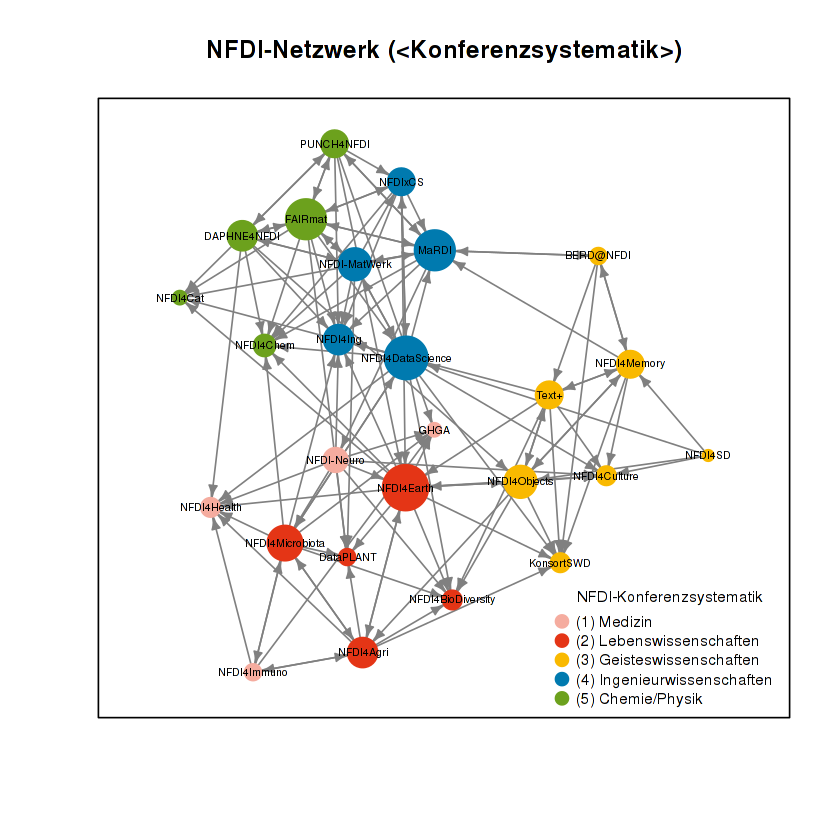

In [21]:
set.seed(1234)

plot(NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<Konferenzsystematik>)",  #<<<<<<<< adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     vertex.color       = NFDI_color_groups,   #<<<<<<<<<<  color of nodes
     vertex.frame.color = NFDI_color_groups,   #<<<<<<<<<< color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = "#808080",   # color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
    )


legend("bottomright",   # x-position
       title  = "NFDI-Konferenzsystematik", # title
       legend = c(
           "(1) Medizin",
           "(2) Lebenswissenschaften",
           "(3) Geisteswissenschaften",
           "(4) Ingenieurwissenschaften",
           "(5) Chemie/Physik"
       ),  # the text of the legend
       col    = NFDI_color_code ,  # colors of lines and points beside the legend text
       pch    = 20,     # the plotting symbols appearing in the legend
       bty    = "n",    # no frame, the type of box to be drawn around the legend (n=no frame)
       cex    = .75,    # character expansion factor relative to current par("cex").
       pt.cex = 2       # expansion factor(s) for the points
)

## Clustering 

Die Einfärbung des Netzwerks mit den Farben der NFDI-Konferenzsystematik lässt die Vermutung zu, dass es bestimmte Gruppen gibt, die eine engere Beziehung zueinander haben (ausgehend von den Kooperationsabsichten in den Letter of Intents).

Wir können in R einen Algorithmus anwenden, der solche Gruppen ermittelt.
Dafür wählen wir den Algorithmus `cluster_optimal`[^12]

In der Dokumentation steht:

> This function calculates the optimal community structure of a graph, by maximizing the modularity measure over all possible partitions.

> Diese Funktion berechnet die optimale Gemeinschaftsstruktur eines Graphen, indem das Modularitätsmaß über alle möglichen Partitionen maximiert wird. (deepl)

Die Anwendung ist denkbar einfach: Wir übergeben der Funktion `cluster_optimal` den Graph `NDFI_network_directed` und speisen es in die neue Variable `NFDI_network_directed_cluster` ein.

In unserer Plotfunktion setzen wir diese neue Variable noch *vor* den bisherigen Datensatz.
Wir verzichten jetzt auf die Darstellung der Kanten, was wir mit `edge.color = NA` erreichen.

Die Einfärberung der Knoten erfolgt nicht mehr über die Parameter `vertex.color` und `vertex.frame.color`, 
sodass wir diese Zeilen auskommentieren oder löschen können. 
Dafür gibt es einen neuen Parameter und wir können `col` den Wert `NFDI_color_groups` übergeben.[^13]

Die Einfassung der Gruppen möchten wir grau hervorheben, was wir mit `mark.col = "grey"` erreichen,
zudem verzichten wir auf die Darstellung des Randes (`mark.border = NA`).


Für die Legende müssen wir nichts anpassen.

[^12]: https://igraph.org/r/doc/cluster_optimal.html
[^13]: https://igraph.org/r/doc/communities.html


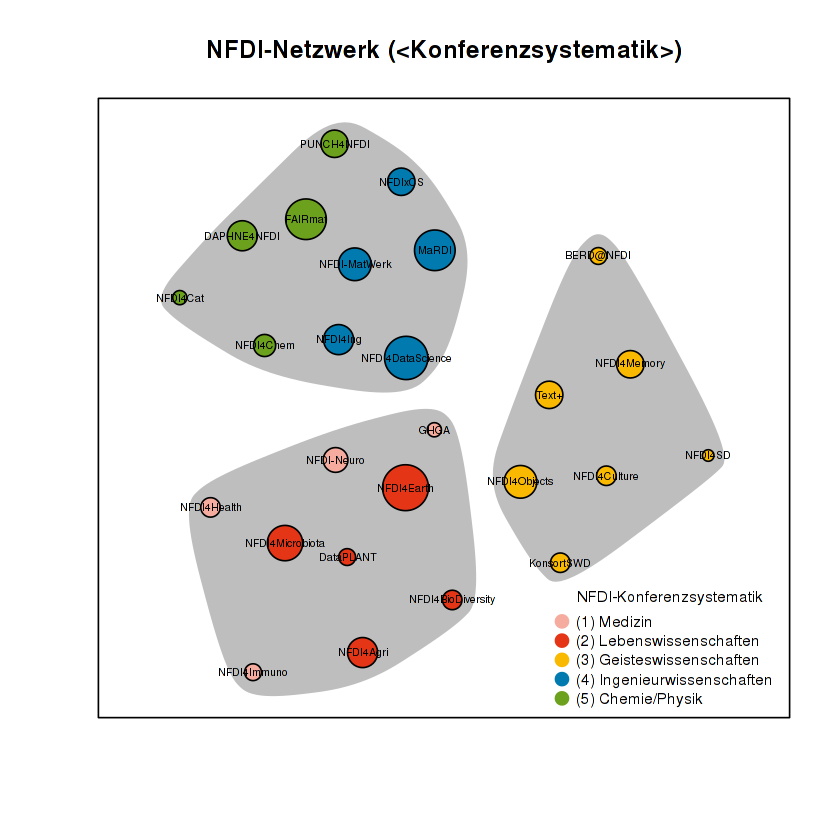

In [22]:
set.seed(1234)

NFDI_network_directed_cluster <- cluster_optimal(NFDI_network_directed)


plot(NFDI_network_directed_cluster,    #<<<<<<<<<<< clustered network data
     NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<Konferenzsystematik>)",  # adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     #vertex.color       = NFDI_color_groups,   #<<<<<<<<<<  color of nodes
     #vertex.frame.color = NFDI_color_groups,   #<<<<<<<<<< color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color         = NA,          #<<<<<<<<<<<<<< color of edges
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
     col    = NFDI_color_groups,       #<<<<<<<<<<<<<  color of nodes
     mark.col           = "grey",      #<<<<<<<<<< color groups
     mark.border        = NA,          #<<<<<<<<<< no border color
    )


legend("bottomright",   # x-position
       title  = "NFDI-Konferenzsystematik", # title
       legend = c(
           "(1) Medizin",
           "(2) Lebenswissenschaften",
           "(3) Geisteswissenschaften",
           "(4) Ingenieurwissenschaften",
           "(5) Chemie/Physik"
       ),  # the text of the legend
       col    = NFDI_color_code ,  # colors of lines and points beside the legend text
       pch    = 20,     # the plotting symbols appearing in the legend
       bty    = "n",    # no frame, the type of box to be drawn around the legend (n=no frame)
       cex    = .75,    # character expansion factor relative to current par("cex").
       pt.cex = 2       # expansion factor(s) for the points
)

Der Algorithmus `cluster_optimal` ermittelt drei Gruppen (oder auch Silos), die just *exakt* mit den NFDI-Konferenzsystematiken übereinstimmen, sodass folgende Gruppen/Silos zustande kommen:

| Silo | NFDI-Konferenzsystematik |
|------|--------------------------|
| (1)  | 1+2                      |
| (2)  | 3                        |
| (3)  | 4+5                      |


Mit diesem Ergebnis stellt sich die Frage, ob es nun wirklich drei Silos gibt und der geforderte transdisziplinäre Austausch und Kooperation ausbleibt.[1]

Es wäre also wichtig zu sehen, ob Kooperationen über die Silo-Grenzen hinweg erfolgen bzw. konkret gesagt, welche Konsortien kooperieren mit welchen Konsortien anderer Silos.

[1]: https://www.youtube.com/watch?v=YmuUT8HkXxY&feature=youtu.be&t=904


## Transdisziplinäre Kooperation

Im letzten Plot dieses Workshops wollen wir die transdisziplinäre Kooperationen hervorheben.

Wir können den vorherigen Plot als ganzes übernehmen.
Lediglich beim Parameter `edge.color` müssen wir die Angabe modifizieren.
Als Wert setzen wir eine Liste, die aus zwei Einträgen besteht (`c(NA,"#bf4040")`):
Der erste Eintrag ist `NA` (`Not Available`), womit wir die cis-disziplinäre Kanten ansteuern; sie werden also nicht ausgegeben. Der zweite Einträg ist ein HTML-Farbcode, den wir für die trans-disziplinäre Kanten verwenden.
Die Unterscheidung zwischen cis- und trans-disziplinärer Kante wird über die Funktion `crossing` vorgenommen.

> `crossing` returns a logical vector, with one value for each edge, ordered according to the edge ids. The value is TRUE iff the edge connects two different communities, according to the (best) membership vector, as returned by `membership()`.[^14]

[^14]: https://igraph.org/r/doc/communities.html



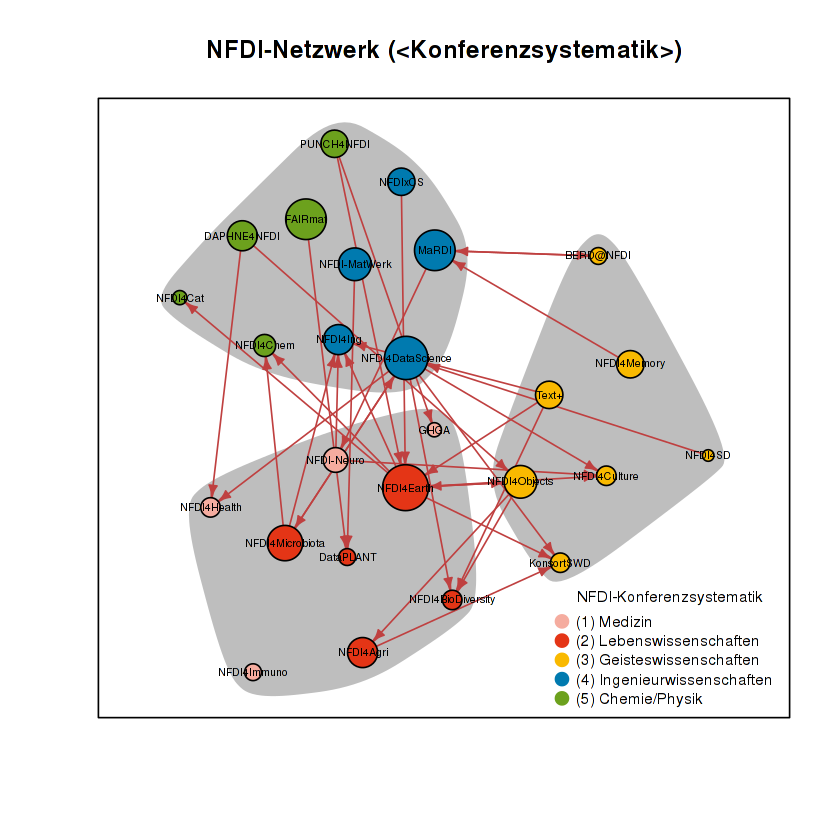

In [15]:
set.seed(1234)

plot(NFDI_network_directed_cluster,    # clustered network data
     NFDI_network_directed,            # loading data frame
     main   = "NFDI-Netzwerk (<Konferenzsystematik>)",  # adding a title
     frame  = TRUE,                    # FALSE -> making a frame 
     layout = layout.graphopt,         # better layout options
     #vertex.color       = NFDI_color_groups,   #  color of nodes
     #vertex.frame.color = NFDI_color_groups,   # color of the frame of nodes
     vertex.label.cex   = 0.5,         # size of the description of the labels
     vertex.label.color = "black",     # color of the description 
                                       # color: https://www.w3schools.com/colors/colors_picker.asp 
     edge.color = c(NA, "#bf4040")[crossing(NFDI_network_directed_cluster, NFDI_network_directed) + 1], 
                                       #<<<<<<<<<<<<<<<<< show only edges if they go to another group
     edge.curved        = 0,           # factor of "curvity"
     vertex.size        = degree(NFDI_network_directed,
                                 mode = "total"), #<<<<<<<<<<< size of nodes depends on amount of edges
     edge.arrow.size    = .5,          # arrow size,  defaults to 1
     col    = NFDI_color_groups,       #  color of nodes
     mark.col           = "grey",      # color groups
     mark.border        = NA,          # no border color
    )


legend("bottomright",   # x-position
       title  = "NFDI-Konferenzsystematik", # title
       legend = c(
           "(1) Medizin",
           "(2) Lebenswissenschaften",
           "(3) Geisteswissenschaften",
           "(4) Ingenieurwissenschaften",
           "(5) Chemie/Physik"
       ),  # the text of the legend
       col    = NFDI_color_code ,  # colors of lines and points beside the legend text
       pch    = 20,     # the plotting symbols appearing in the legend
       bty    = "n",    # no frame, the type of box to be drawn around the legend (n=no frame)
       cex    = .75,    # character expansion factor relative to current par("cex").
       pt.cex = 2       # expansion factor(s) for the points
)

Es zeigt sich eine rege Interaktion auch zwischen den einzelnen Silos.
Nur ein Konsortium hat keine transdisziplinäre Verbindung.


# Schluss

Wir haben die Netzwerkvisualisierung und -analyse nur anhand des Pakets `igraph` gemacht.
Jetzt gilt es noch das Ergebnis zu sichern, bspw. unter "*File*" --> "*Save and Checkpoint*".

Ihr könnt ebenso das JupyterNotebook herunterladen, es stehen verschiedene Formate bereit.

Zudem ist das JupyterNotebook über die URL jederzeit wieder ansteuerbar und ihr könnt weitere Modifikationen im Netzwerk vornehmen.

Es gibt noch weitere spannende Beschäftigungen mit diesem Netzwerk.
Zum Beispiel kann man auch ein interaktives Netzwerk erstellen oder das Netzwerk als Kreisdiagramm darstellen.

Beides könnt ihr selbst ausprobieren unter: https://nfdi4ing.de/nfdi-network  
Das Passwort lautet `fdmrwth`.


